In [59]:
# !pip install seaborn matplotlib pandas numpy (install libraries if you don't have)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Data Inspection

In [4]:
# Check data
df = pd.read_csv('shopping_trends_updated.csv')

# View data info
df.info()

# Check for null values (None)
pd.set_option('display.max_columns', None)

# Check for duplicated rows (None)
print(df.duplicated())

# View descriptive statistics
print(df.describe())

for data in df.columns:
    print(data)
    print(df[data].unique())
    print("=======================================================")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
# 2. Demographic Analysis

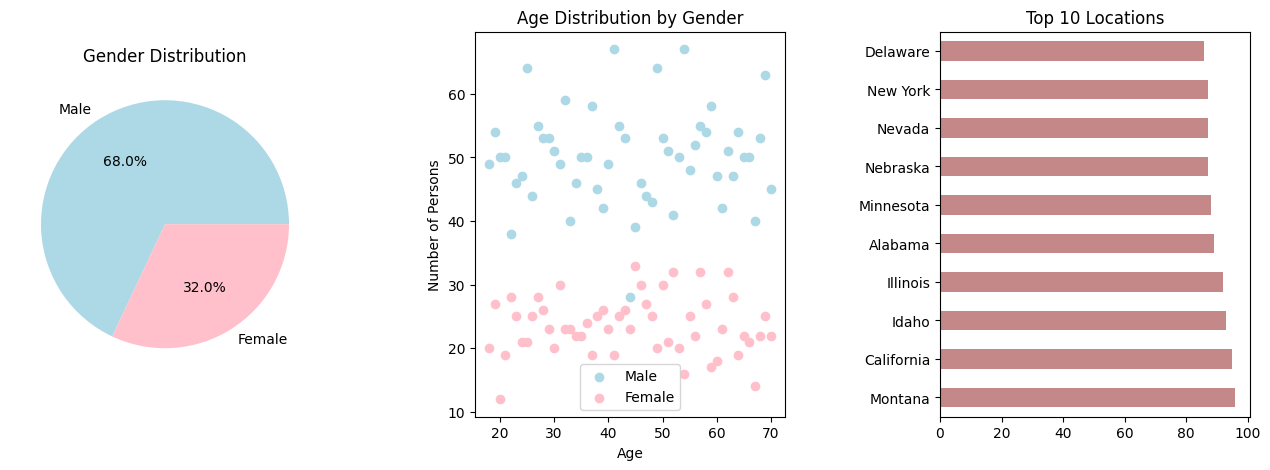

In [7]:
# Gender Distribution
labels = []
gender_counts = df['Gender'].value_counts()
count_M = gender_counts.get('Male', 0)
count_F = gender_counts.get('Female', 0)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
plt.subplots_adjust(wspace = 0.5)
axes[0].pie([count_M, count_F],
        autopct = '%1.1f%%',
        colors = ['lightblue', 'pink'],
        labels = ('Male', 'Female')
)
axes[0].set_title('Gender Distribution')
axes[0].set_ylabel('')

# Age Distribution by Gender
age_gender = df.groupby(['Age', 'Gender'])['Age'].size().unstack()
axes[1].scatter(age_gender.index, age_gender['Male'], color = 'lightblue', label = 'Male')
axes[1].scatter(age_gender.index, age_gender['Female'], color = 'pink', label = 'Female')
axes[1].legend()
axes[1].set_title('Age Distribution by Gender')
axes[1].set_ylabel('Number of Persons')
axes[1].set_xlabel('Age')

# Top 10 Locations with highest purchases.
location = df.groupby(['Location'])['Location'].size().nlargest(10)
location.plot(kind = 'barh', color = '#C48888', ax = axes[2])
axes[2].set_title('Top 10 Locations')
axes[2].set_xlabel('')
axes[2].set_ylabel('')
plt.show()

In [ ]:
# 3. Purchase Behavior Analysis

In [ ]:
# Purchase Amount by Gender & Age Range

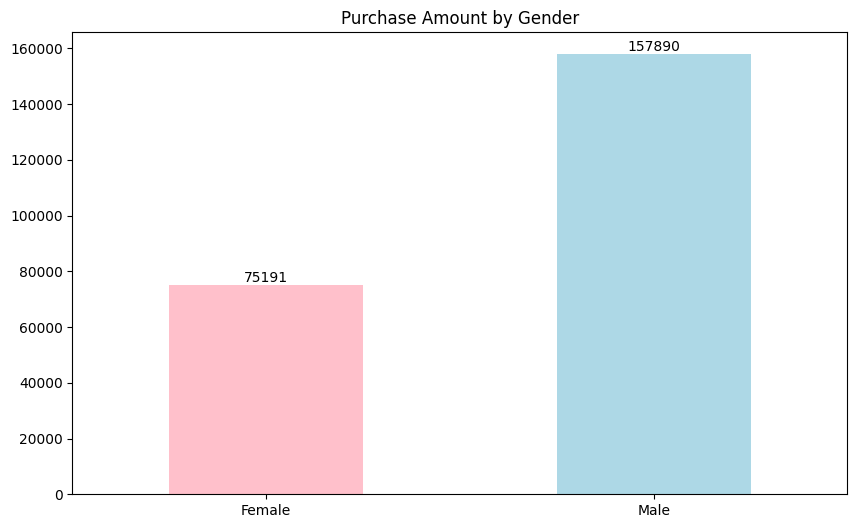

In [8]:
gender_buy = df.groupby(['Gender'])['Purchase Amount (USD)'].sum()
bars = gender_buy.plot(kind = 'bar', color = ['pink', 'lightblue'], figsize = (10, 6))
for bar in bars.containers:
    bars.bar_label(bar, label_type = 'edge')
plt.xlabel('')
plt.ylabel('')
plt.title('Purchase Amount by Gender')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Purchase Amount by Age Range

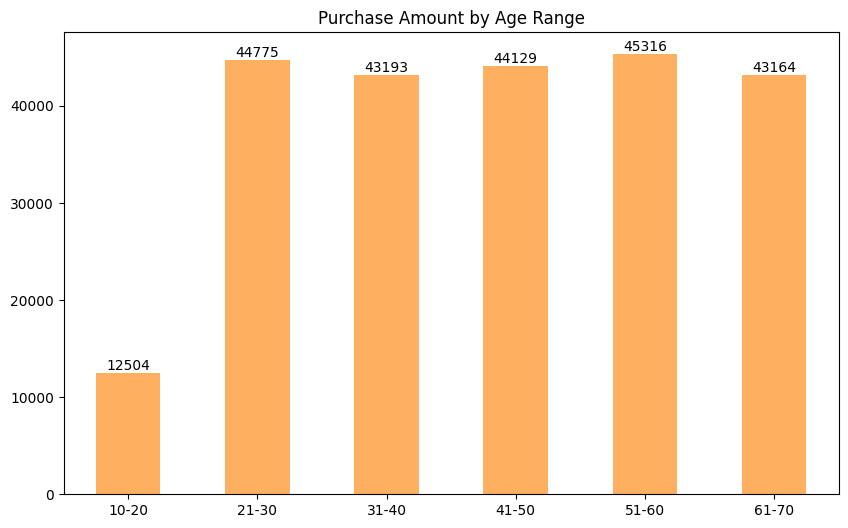

In [58]:
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels)
ageprice = df.groupby(['Age Range'], observed = False)['Purchase Amount (USD)'].sum()
bars = ageprice.plot(kind = 'bar', color = '#FFAF60', figsize = (10, 6))
for bar in bars.containers:
    bars.bar_label(bar, label_type = 'edge')
plt.xlabel('')
plt.ylabel('')
plt.title('Purchase Amount by Age Range')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Top 10 Products by Sales vs. Quantities

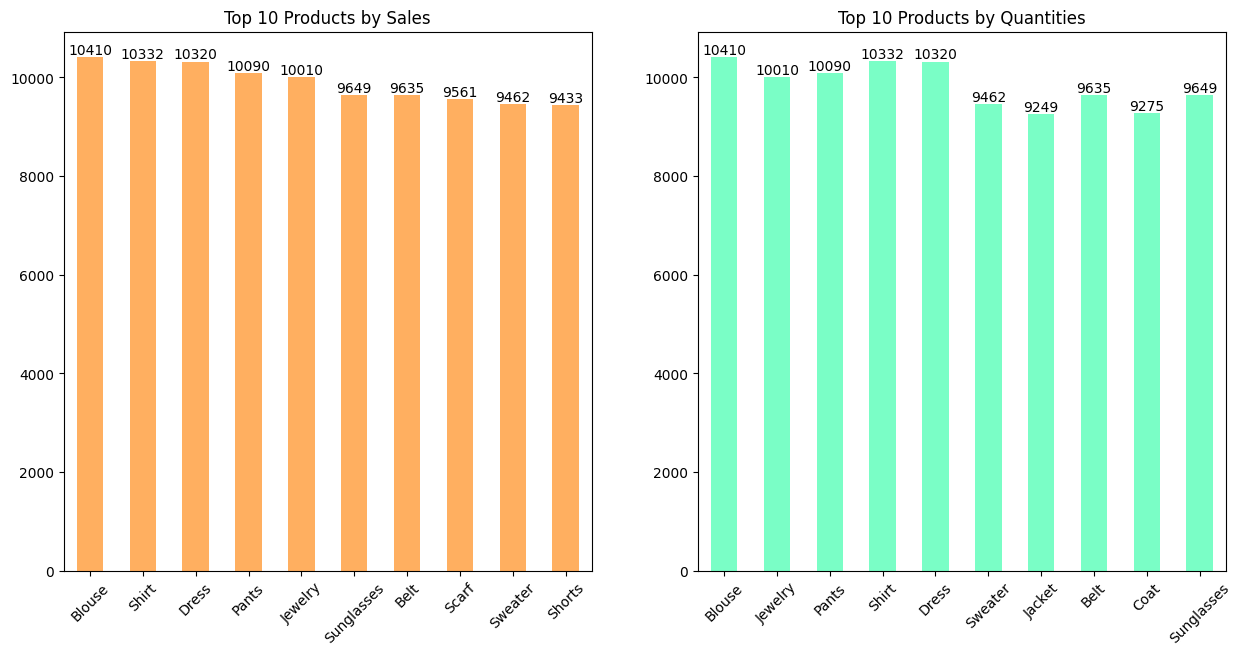

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (15, 7))
product = df.groupby(['Item Purchased'])['Purchase Amount (USD)'].sum().nlargest(10)
bars1 = product.plot(kind = 'bar', color = '#FFAF60', ax = axes[0])
for i, bar1 in enumerate(bars1.patches):
    height = bar1.get_height()
    axes[0].text(bar1.get_x() + bar1.get_width() / 2, height, height, ha = 'center', va = 'bottom')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('Top 10 Products by Sales')
axes[0].tick_params(axis = 'x', rotation = 45)
product_sum = df.groupby(['Item Purchased'])['Purchase Amount (USD)'].sum()
product_ten = df.groupby(['Item Purchased']).size().nlargest(10)
product = product_sum.loc[product_ten.index]
bars2 = product.plot(kind = 'bar', color = '#7AFEC6', ax = axes[1])
for x, bar2 in enumerate(bars2.patches):
    height = bar2.get_height()
    axes[1].text(bar2.get_x() + bar2.get_width() / 2, height, height, ha = 'center', va = 'bottom')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Top 10 Products by Quantities')
axes[1].tick_params(axis = 'x', rotation = 45)
plt.show()

In [ ]:
# 4. Product Analysis

In [14]:
# Top Categories, Sizes, and Colors on Sales

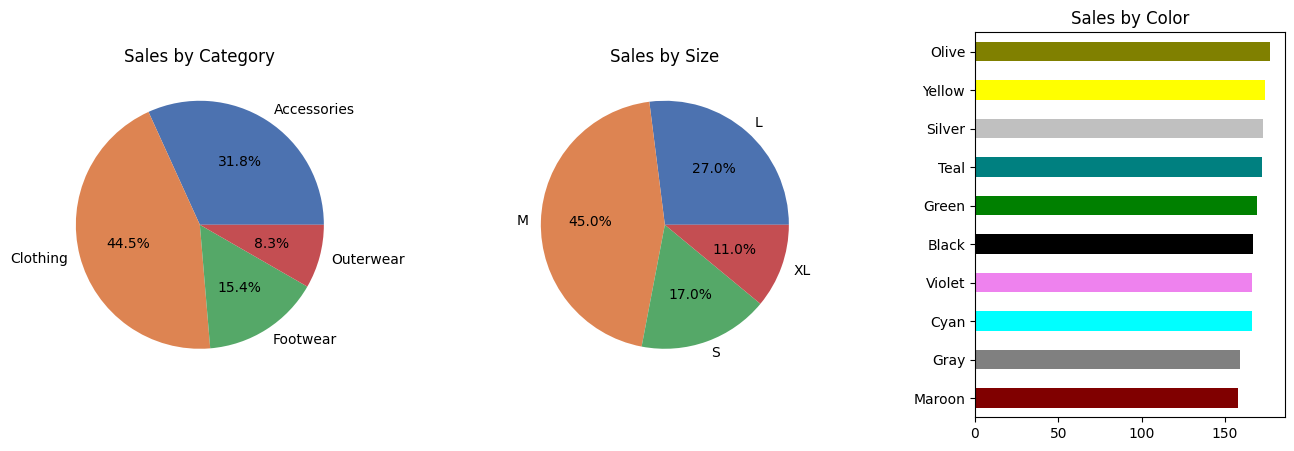

In [15]:
category = df.groupby(['Category']).size()
fig, axes = plt.subplots(1, 3, figsize = (16, 5))
category.plot(kind = 'pie', autopct = '%1.1f%%', colors = sns.color_palette('deep'), ax = axes[0])
axes[0].set_title('Sales by Category')
axes[0].set_ylabel('')
size = df.groupby(['Size']).size()
size.plot(kind = 'pie', autopct = '%1.1f%%', colors = sns.color_palette('deep'), ax = axes[1])
axes[1].set_title('Sales by Size')
axes[1].set_ylabel('')
color = df.groupby(['Color']).size().nlargest(10).sort_values(ascending = True)
colors = []
row = 0
while row <= 9:
    colors.append(color.index[row])
    row += 1
color.plot(kind = 'barh', color = colors, ax = axes[2])
axes[2].set_title('Sales by Color')
axes[2].set_ylabel('')
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [ ]:
# Sales by Gender across Product Categories

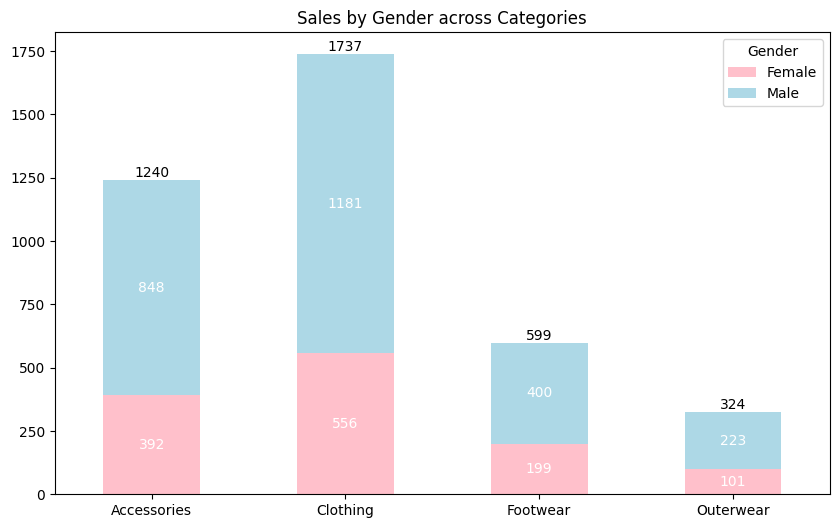

In [18]:
category_age = df.groupby(['Category', 'Gender']).size().unstack()
category_age.plot(kind = 'bar', color = ['pink', 'lightblue'], figsize = (10, 6), stacked = True)
plt.title('Sales by Gender across Categories')
plt.xlabel('')
plt.xticks(rotation = 0)
for i in range(len(category_age)):
    female_value = category_age.iloc[i, 0]
    male_value = category_age.iloc[i, 1]
    total = female_value + male_value
    plt.text(i, female_value / 2, female_value, ha = 'center', va = 'center', color = 'white')
    plt.text(i, female_value + male_value / 2, male_value, ha = 'center', va = 'center', color = 'white')
    plt.text(i, total, total, ha = 'center', va = 'bottom')
plt.show()

In [ ]:
# 5. Geographical Sales Performance

In [ ]:
# Top 10 Locations by Sales Figures

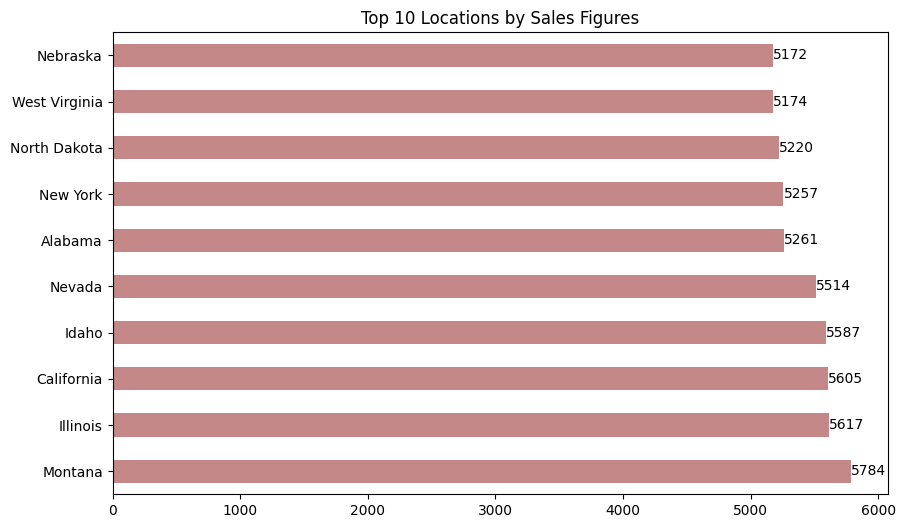

In [21]:
location = df.groupby(['Location'])['Purchase Amount (USD)'].sum().nlargest(10)
barhs = location.plot(kind = 'barh', color = '#C48888', figsize = (10, 6))
for barh in barhs.containers:
    barhs.bar_label(barh, label_type = 'edge')
plt.title('Top 10 Locations by Sales Figures')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
# 6. Shipping & Payment Preferences

In [ ]:
# Shipping Methods and Payment Methods

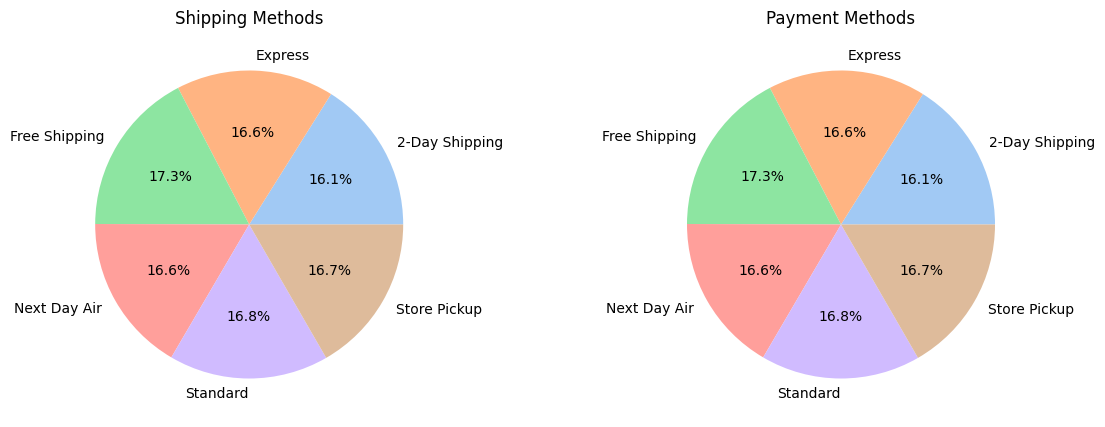

In [28]:
deliver = df.groupby(['Shipping Type']).size()
fig, axes = plt.subplots(1, 2, figsize = (14, 5))
deliver.plot(kind = 'pie', autopct = '%1.1f%%', colors = sns.color_palette('pastel'), ax = axes[0])
axes[0].set_title('Shipping Methods')
axes[0].set_ylabel('')
pay = df.groupby(['Payment Method']).size()
deliver.plot(kind = 'pie', autopct = '%1.1f%%', colors = sns.color_palette('pastel'), ax = axes[1])
axes[1].set_title('Payment Methods')
axes[1].set_ylabel('')
plt.show()

In [ ]:
# 7. Subscription and Purchase Frequency

In [ ]:
# Impact of Subscription on Purchase Frequency

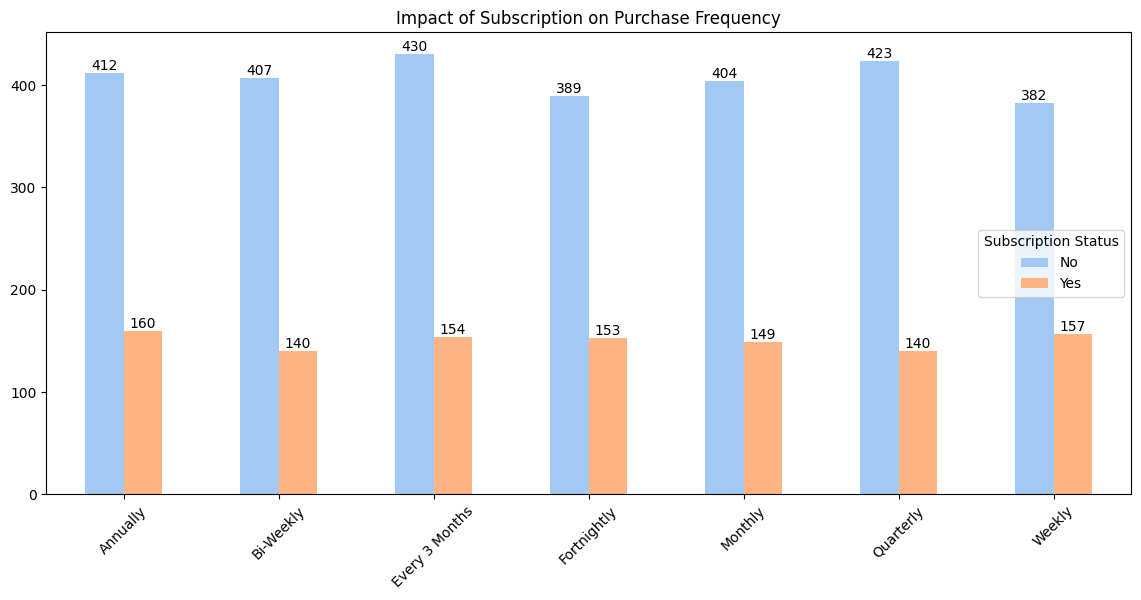

In [31]:
frequency = df.groupby(['Frequency of Purchases', 'Subscription Status'], observed = False)['Frequency of Purchases'].size().unstack()
bars = frequency.plot(kind = 'bar', color = sns.color_palette('pastel'), figsize = (14, 6))
for bar in bars.containers:
    bars.bar_label(bar, label_type = 'edge')
plt.title('Impact of Subscription on Purchase Frequency')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# 8. Seasonal Sales Analysis

In [ ]:
# Quarterly Trends

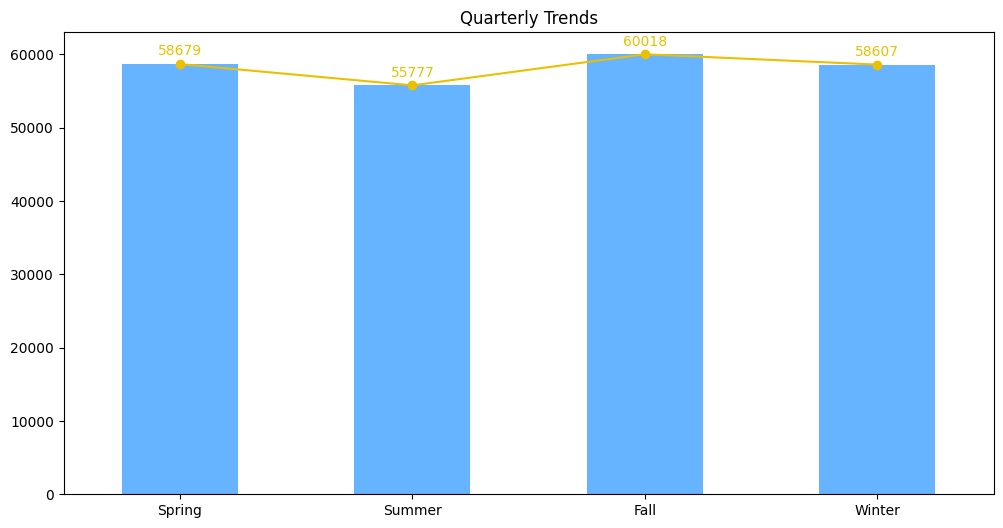

In [32]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
df['Season'] = pd.Categorical(df['Season'], categories = season_order, ordered = True)
seasonsales = df.groupby(['Season'], observed = False)['Purchase Amount (USD)'].sum()
bars = seasonsales.plot(kind='bar', color='#66B3FF', figsize = (12, 6))
lines = seasonsales.plot(kind = 'line', color = '#EAC100', marker='o', ax = bars)
for i, value in enumerate(seasonsales):
    lines.text(i, value + 0.02 * max(seasonsales), value, ha='center', color='#EAC100')
plt.title('Quarterly Trends')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [ ]:
# 9. Top 10 Products Performances Analysis

In [33]:
# Top 10 Products by Color Preference & Sales

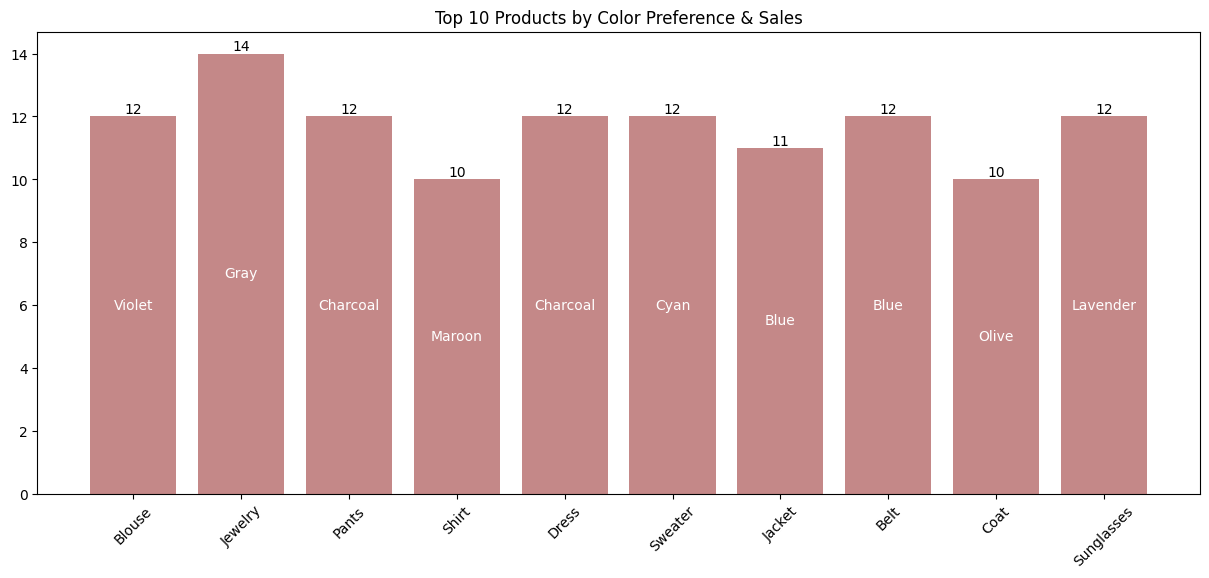

In [36]:
ten_size = []
color = []
for item in product_ten.index:
    product_color = df[df['Item Purchased'] == item].groupby(['Color']).size()
    max_color = product_color.idxmax()
    max_count = product_color.max()
    color.append(max_color)
    ten_size.append(int(max_count))
plt.figure(figsize = (15, 6))
bars = plt.bar(product_ten.index, ten_size, color = '#C48888')
plt.title('Top 10 Products by Color Preference & Sales')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 45)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, color[i], ha = 'center', va = 'center', color = 'white')
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha = 'center', va = 'bottom')
plt.show()


In [ ]:
# Top 10 Products by Category & Sales

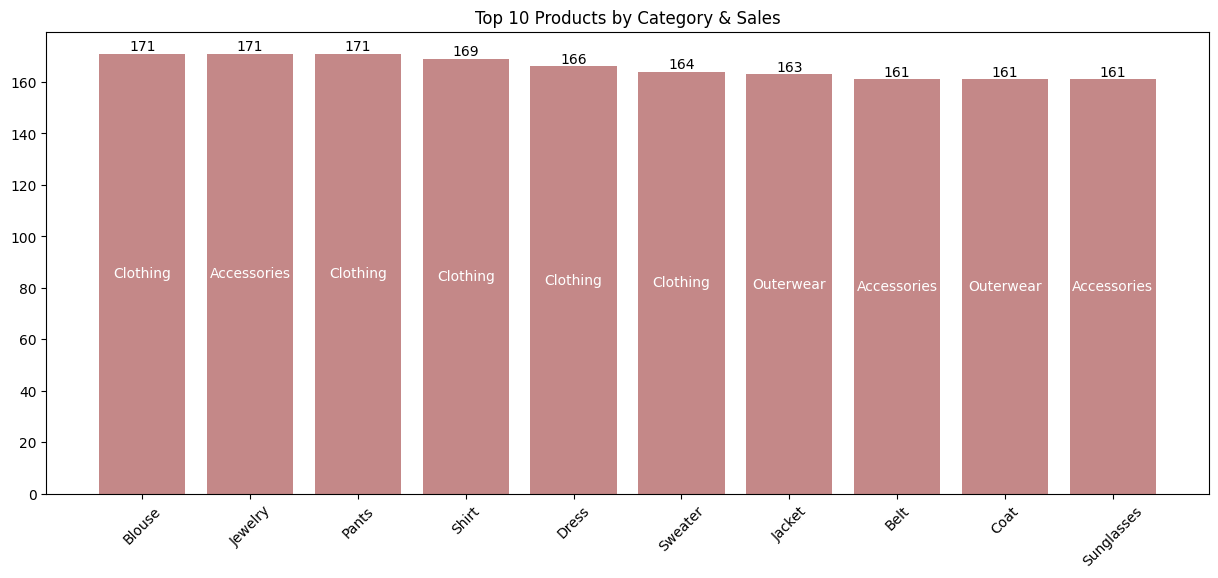

In [39]:
ten_size = []
category = []
for item in product_ten.index:
    product_cat = df[df['Item Purchased'] == item].groupby(['Category']).size()
    max_cat = product_cat.idxmax()
    max_count = product_cat.max()
    category.append(max_cat)
    ten_size.append(int(max_count))
plt.figure(figsize = (15, 6))
bars = plt.bar(product_ten.index, ten_size, color = '#C48888')
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Products by Category & Sales')
plt.xticks(rotation = 45)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, category[i], ha = 'center', va = 'center', color = 'white')
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha = 'center', va = 'bottom')
plt.show()

In [35]:
# Top 10 Products by Purchase Frequency

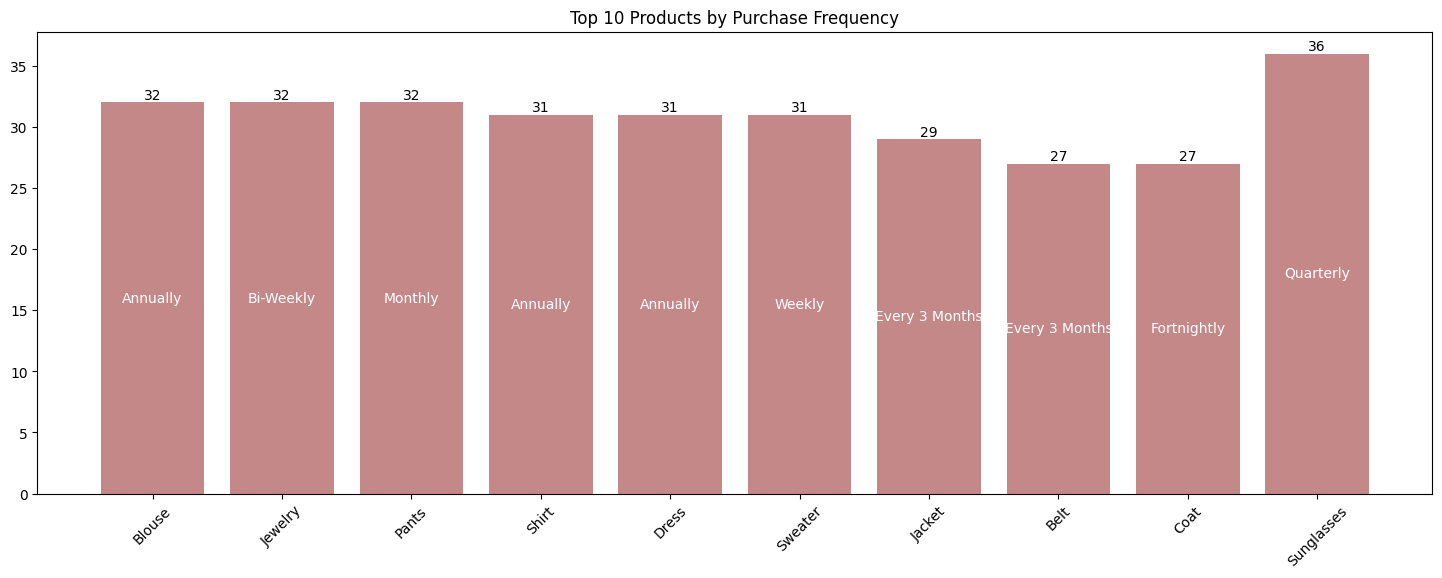

In [40]:
product_max_fres = []
max_freq_types = []
for item in product_ten.index:
    freq_counts = df[df['Item Purchased'] == item].groupby('Frequency of Purchases').size()
    max_freq = freq_counts.idxmax()
    max_count = freq_counts.max()
    product_max_fres.append(max_count)
    max_freq_types.append(max_freq)
plt.figure(figsize = (18, 6))
bars = plt.bar(product_ten.index, product_max_fres, color = '#C48888')
plt.title('Top 10 Products by Purchase Frequency')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 45)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, max_freq_types[i], ha = 'center', va = 'center', color = 'white')
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha = 'center', va = 'bottom')
plt.show()

In [ ]:
# Top 10 Products - Seasonal Sales Trends

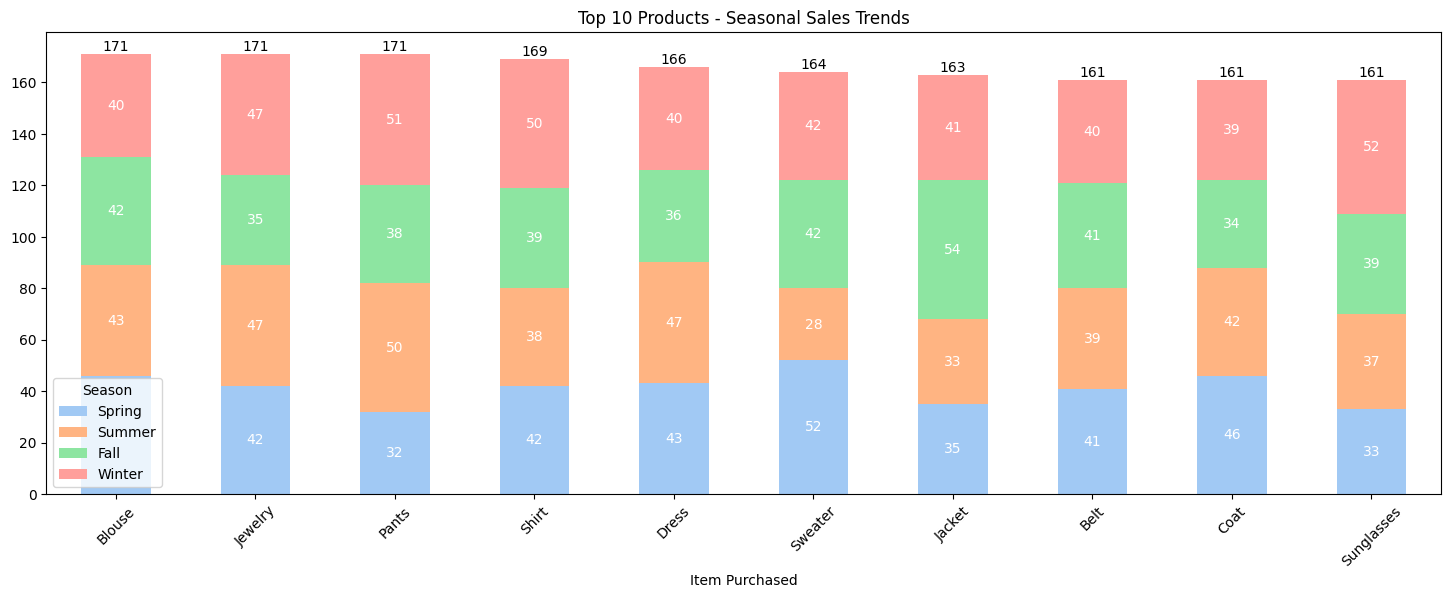

In [43]:
product_season = df.groupby(['Item Purchased', 'Season'], observed = False).size().unstack()
product = product_season.loc[product_ten.index]
product.plot(kind = 'bar', color = sns.color_palette('pastel'), figsize=(18, 6), stacked = True)
for i in range(len(product)):
    fall = product.iloc[i, 0]
    spring = product.iloc[i, 1]
    summer = product.iloc[i, 2]
    winter = product.iloc[i, 3]
    total = fall + spring + summer + winter
    plt.text(i, fall / 2, int(fall), ha = 'center', va = 'center', color = 'white')
    plt.text(i, fall + spring / 2, int(spring), ha = 'center', va = 'center', color = 'white')
    plt.text(i, fall + spring + summer / 2, int(summer), ha = 'center', va = 'center', color = 'white')
    plt.text(i, fall + spring + summer + winter / 2, int(winter), ha = 'center', va = 'center', color = 'white')
    plt.text(i, total, total, ha = 'center', va = 'bottom', color = 'black')
plt.title('Top 10 Products - Seasonal Sales Trends')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# 10. Product Reviews

In [ ]:
# Top 10 Reviewed Products vs. Most Purchased

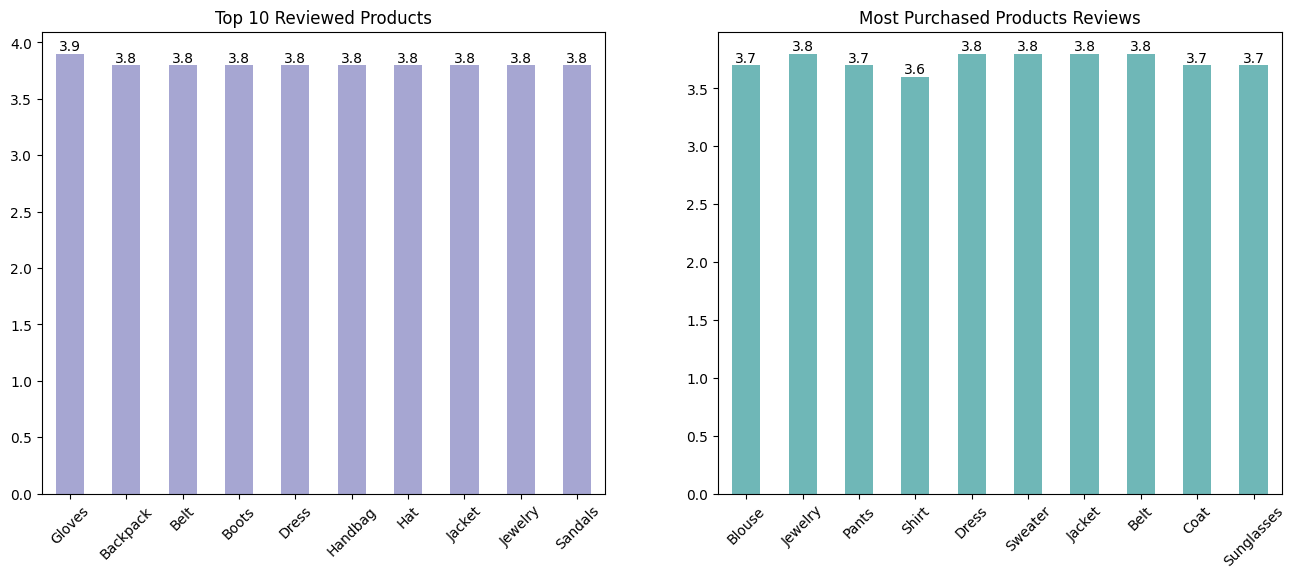

In [47]:
review_ten = df.groupby(['Item Purchased'])['Review Rating'].mean().round(1).nlargest(10)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
bars1 = review_ten.plot(kind = 'bar', color = '#A6A6D2', ax = axes[0])
for i, bar1 in enumerate(bars1.patches):
    height = bar1.get_height()
    axes[0].text(bar1.get_x() + bar1.get_width() / 2, height, height, ha = 'center', va = 'bottom')
axes[0].set_title('Top 10 Reviewed Products')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)
product_review = df.groupby(['Item Purchased', ])['Review Rating'].mean().round(1)
product_ten_review = product_review.loc[product_ten.index]
bars2 = product_ten_review.plot(kind = 'bar', color = '#6FB7B7', ax = axes[1])
for x, bar2 in enumerate(bars2.patches):
    height = bar2.get_height()
    axes[1].text(bar2.get_x() + bar2.get_width() / 2, height, height, ha = 'center', va = 'bottom')
axes[1].set_title('Most Purchased Products Reviews')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis = 'x', rotation = 45)
plt.show()

In [ ]:
#　Impact of Age and Gender on Review Scores

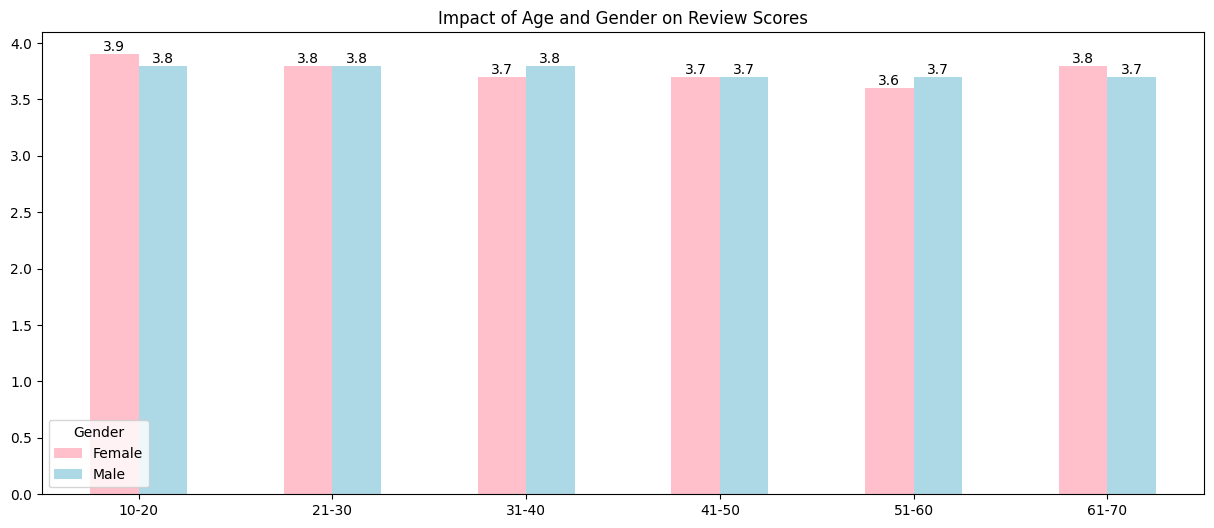

In [51]:
gen_age_review = df.groupby(['Age Range', 'Gender'], observed = False)['Review Rating'].mean().round(1).unstack()
bars = gen_age_review.plot(kind = 'bar', color = ['pink', 'lightblue'], figsize = (15, 6))
plt.title('Impact of Age and Gender on Review Scores')
for bar in bars.containers:
    bars.bar_label(bar, label_type = 'edge')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# 11. Discounts Impact on Purchase

In [ ]:
# Effect of Discounts by Gender

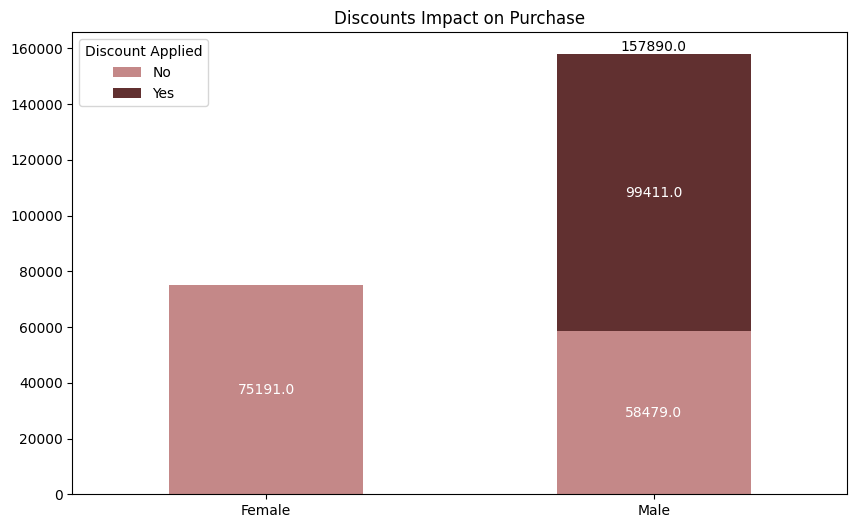

In [55]:
discount = df.groupby([ 'Gender','Discount Applied'])['Purchase Amount (USD)'].sum().unstack()
discount.plot(kind = 'bar', color = ['#C48888', '#613030'], figsize = (10, 6), stacked = True)
plt.title('Discounts Impact on Purchase')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 0)
for i in range(len(discount)):
    no_value = discount.iloc[i, 0]
    yes_value = discount.iloc[i, 1]
    total = no_value + yes_value
    plt.text(i, no_value / 2, no_value, ha = 'center', va = 'center', color = 'white')
    plt.text(i, no_value + yes_value / 2, yes_value, ha = 'center', va = 'center', color = 'white')
    plt.text(i, total, total, ha = 'center', va = 'bottom')
plt.show()

In [ ]:
# 12. Correlation Analysis

In [ ]:
# Pearson Correlation Heatmap: For numeric feature relationships.

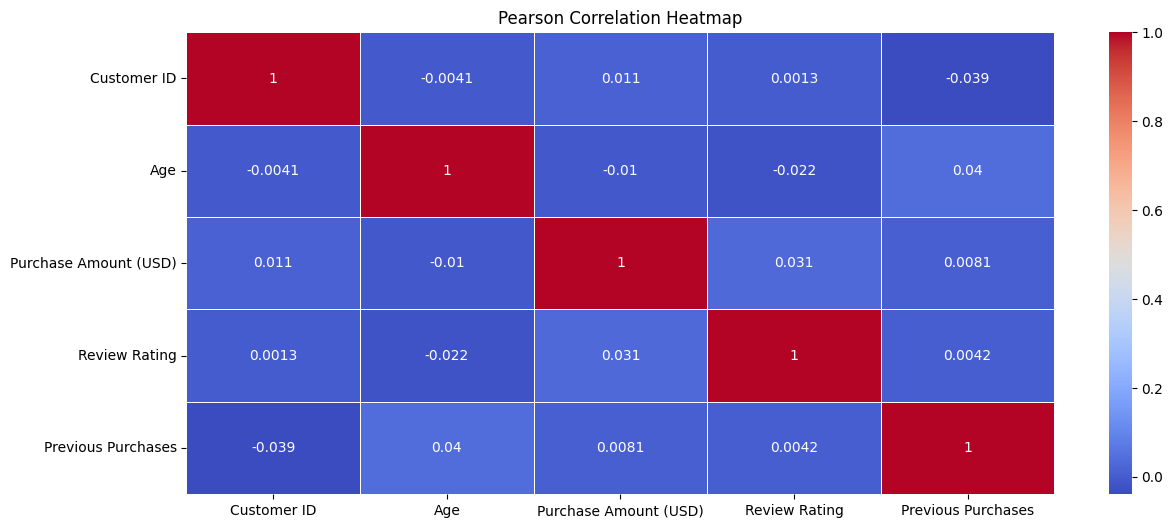

In [57]:
numeric = df.select_dtypes(include = ['number'])
correlation = numeric.corr()
plt.figure(figsize = (14, 6))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()